In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
import pandas as pd
from scipy import signal

In [2]:
def load_data(filename):
    raw = np.genfromtxt(filename, delimiter=',')
    raw = raw[:, :-1]
    #print(raw)
    #print(raw.shape)
    return raw

def pre_slope_std(raw):
    std = np.std(raw, axis=0)
    de = []
    i = 0
    i_max = raw.shape[0]
    i_flag = 0
    i_tf = False
    while i < i_max - 1:
        for j in range(raw.shape[1]):
            if abs(raw[i + 1][j] - raw[i_flag][j]) > 3.5 * std[j] :
                de.append(i + 1)
                i_tf = True
                break
        i = i + 1
        if not i_tf:
            i_flag = i
        i_tf = False
            
    preprocess = np.delete(raw, de, 0)
    #print(preprocess.shape)
    return preprocess

def draw(raw, preprocess):
    print(raw.shape, preprocess.shape)
    plt.figure(2, figsize=(20,16))
    plt.subplot(211)
    f1 = plt.plot(raw)
    plt.subplot(212)
    f2 = plt.plot(preprocess)

def pre_save(preprocess, dir_path, data_path):
    try:
        os.mkdir(dir_path, mode=0o775)
    except:
        print("dir exists!!")
    if os.path.exists(data_path):
        print("file exists!!")
    np.savetxt(data_path, preprocess, delimiter=",", fmt='%.4f')

def cap_save(preprocess, data_path):
    if os.path.exists(data_path):
        print("file exists!!")
    np.savetxt(data_path, preprocess, delimiter=",", fmt='%.4f')

def pca(data):
    Pca = PCA(n_components=10)
    Pca.fit(data)
    print(Pca.explained_variance_ratio_)
    print(Pca.singular_values_)
    return Pca.transform(data)

def denoice(data):
    dataframe = pd.DataFrame(data)
    rol = dataframe.rolling(25).mean()
    zz = rol.to_numpy()
    zz = zz[~np.isnan(zz).any(axis=1) , : ]
    return zz

(4530, 56) (4459, 56)


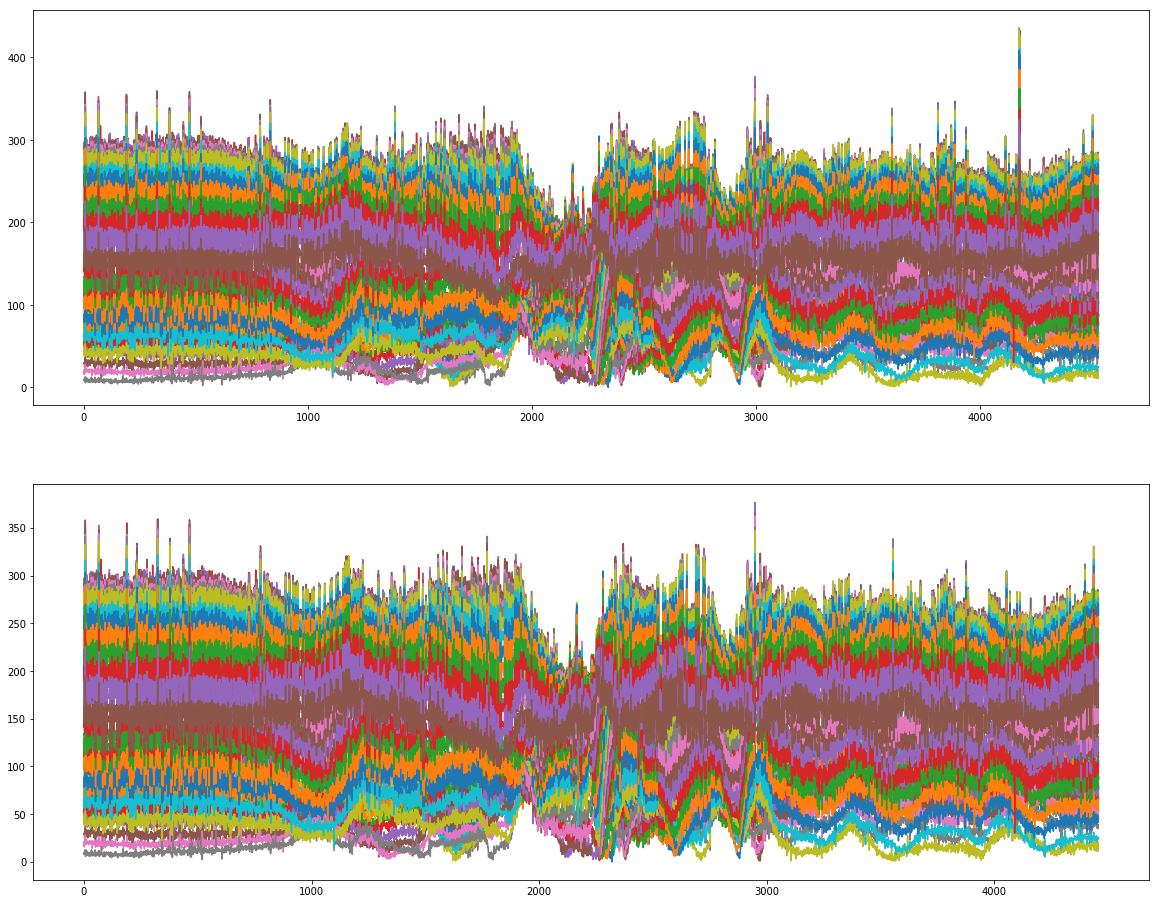

In [99]:
# load data
filename = "testing/" + action + "-" + str(data_num) + "/csv" + str(TX) + "x" + str(RX) + ".csv"
#filename = "test/csv" + str(TX) + "x" + str(RX) + ".csv"
raw = load_data(filename)
preprocess = pre_slope_std(raw)
draw(raw,preprocess)

(4750, 56)


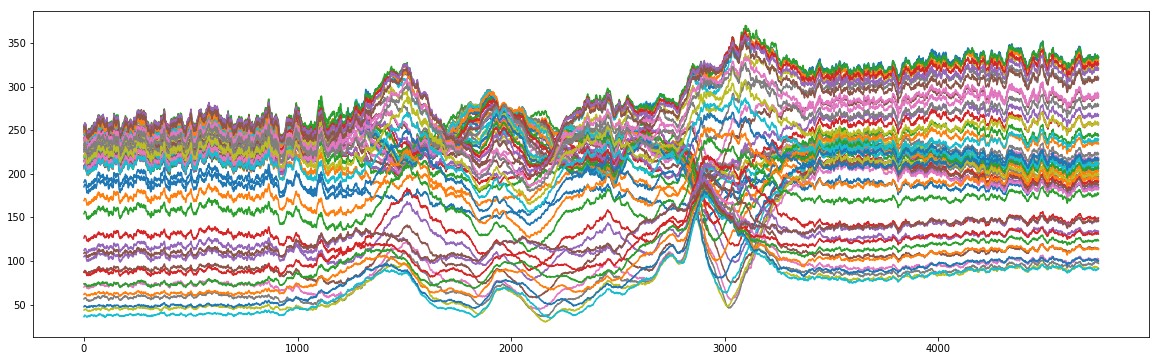

In [13]:
# load data
TX = 1
RX = 3
data_num = 14
action = "sit"
filename = "testing/" + action + "-" + str(data_num) + "/csv" + str(TX) + "x" + str(RX) + ".csv"
raw = load_data(filename)
preprocess = pre_slope_std(raw)
#draw(raw,preprocess)

# de-noice
de = denoice(raw)
print(de.shape)
plt.figure(1, figsize=(20,6))
f = plt.plot(de)

(2000, 56)


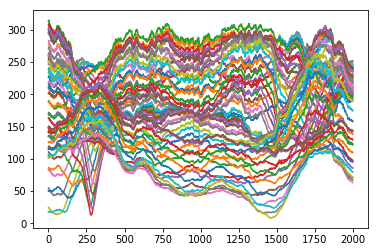

In [10]:
# cut
start = 1100
capture = de[start : start+2000]
f = plt.plot(capture)
print(capture.shape)

In [12]:
# save to file
for TX in range(1, 3):
    print("TX:", TX)
    filename = "testing/" + action + "-" + str(data_num) + "/csv" + str(TX) + "x" + str(RX) + ".csv"
    data_path = "testing/capture/" + action + "-" + str(data_num)  + "-" + str(TX) + ".csv"
    raw = load_data(filename)
    de = denoice(raw)
    capture = de[start : start+2000]
    cap_save(capture, data_path)

TX: 1
file exists!!
TX: 2
file exists!!


[7.81989375e-01 1.13933052e-01 6.06123474e-02 2.60122000e-02
 1.34898037e-02 1.63726139e-03 9.07578802e-04 4.42153192e-04
 2.71629980e-04 1.65827395e-04]
[13133.28129181  5012.99977947  3656.39723546  2395.30798432
  1724.94651886   600.94099313   447.41958623   312.29080876
   244.77196287   191.24978643]


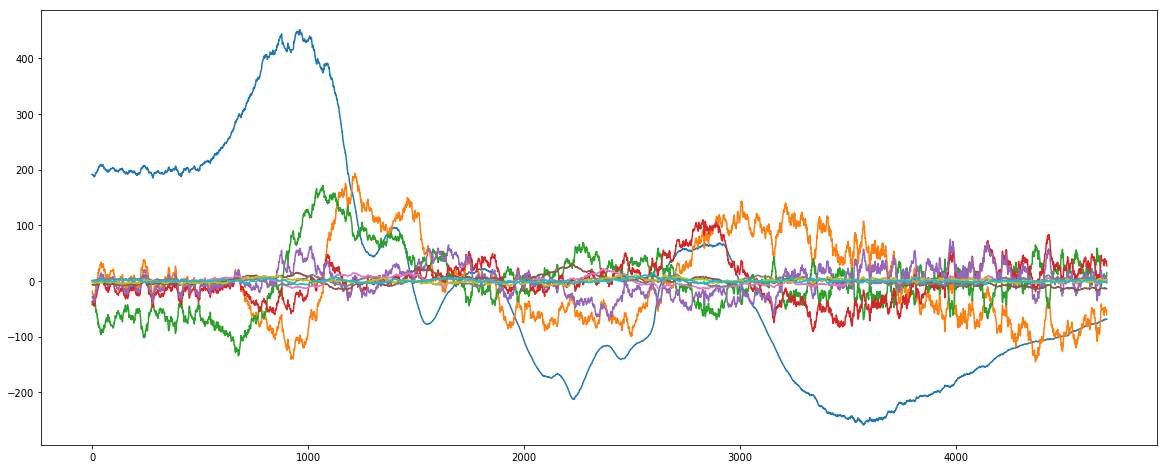

In [8]:
# PCA
Pca = pca(de)
plt.figure(1, figsize=(20,8))
f = plt.plot(Pca)